# **Web Scrapping of News Articles of Adani Stocks**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime

def scrape_news(query, start_date, end_date):
    articles = []
    url = f"https://news.google.com/rss/search?q={query}+after:{start_date}+before:{end_date}"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'xml')
    items = soup.find_all('item')
    
    for item in items:
        title = item.title.text
        link = item.link.text
        pub_date = item.pubDate.text
        articles.append({'title': title, 'link': link, 'pub_date': pub_date})
    return pd.DataFrame(articles)

# Define the date range and query
start_date = '2021-01-01'
end_date = '2023-12-31'
query = "Adani stocks"

# Convert start and end dates to datetime objects
start_date_dt = datetime.datetime.strptime(start_date, '%Y-%m-%d')
end_date_dt = datetime.datetime.strptime(end_date, '%Y-%m-%d')

# Initialize an empty DataFrame to store all articles
all_articles = pd.DataFrame()

# Loop through each month in the date range
current_date = start_date_dt
while current_date < end_date_dt:
    # Define the next month's start date
    next_date = current_date + datetime.timedelta(days=30)
    
    # Format dates to strings
    start_str = current_date.strftime('%Y-%m-%d')
    end_str = next_date.strftime('%Y-%m-%d')
    
    # Scrape news for the current month
    month_articles = scrape_news(query, start_str, end_str)
    
    # Append month articles to the all_articles DataFrame
    all_articles = pd.concat([all_articles, month_articles], ignore_index=True)
    
    # Move to the next month
    current_date = next_date

# Save all articles to a CSV file
all_articles.to_csv('adani_news.csv', index=False)


In [2]:
news_df = pd.read_csv('adani_news.csv')
news_df.head()

,title,link,pub_date
0,"Opposition takes on Adani's Rs 53,400-crore pr...",https://news.google.com/rss/articles/CBMikwFod...,"Mon, 18 Jan 2021 08:00:00 GMT"
1,Adani Green stock price up 4% after ACME Trade...,https://news.google.com/rss/articles/CBMihgFod...,"Thu, 14 Jan 2021 08:00:00 GMT"
2,"Axis Bank, Tata Steel, NMDC among 65 stocks lo...",https://news.google.com/rss/articles/CBMikgFod...,"Tue, 05 Jan 2021 08:00:00 GMT"
3,Mid-cap Picks With Anil Singhvi: Adani Green E...,https://news.google.com/rss/articles/CBMimQFod...,"Wed, 20 Jan 2021 08:00:00 GMT"
4,"AAI hands over Jaipur, Guwahati, Thiruvanantha...",https://news.google.com/rss/articles/CBMirwFod...,"Tue, 19 Jan 2021 08:00:00 GMT"


In [3]:
news_df['link'][0]

'https://news.google.com/rss/articles/CBMikwFodHRwczovL3d3dy5idXNpbmVzcy1zdGFuZGFyZC5jb20vYXJ0aWNsZS9jb21wYW5pZXMvb3Bwb3NpdGlvbi10YWtlcy1vbi1hZGFuaS1zLXJzLTUzLTQwMC1jcm9yZS1wcm9qZWN0LWFoZWFkLW9mLXB1YmxpYy1oZWFyaW5nLTEyMTAxMTgwMTA5MV8xLmh0bWzSAZcBaHR0cHM6Ly93d3cuYnVzaW5lc3Mtc3RhbmRhcmQuY29tL2FtcC9hcnRpY2xlL2NvbXBhbmllcy9vcHBvc2l0aW9uLXRha2VzLW9uLWFkYW5pLXMtcnMtNTMtNDAwLWNyb3JlLXByb2plY3QtYWhlYWQtb2YtcHVibGljLWhlYXJpbmctMTIxMDExODAxMDkxXzEuaHRtbA?oc=5'

# **Applying NLP for pre processing of news text**

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

news_df['cleaned_text'] = news_df['title'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\risha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
news_df.head()

,title,link,pub_date,cleaned_text
0,"Opposition takes on Adani's Rs 53,400-crore pr...",https://news.google.com/rss/articles/CBMikwFod...,"Mon, 18 Jan 2021 08:00:00 GMT",opposition takes adani rs 53 400 crore project...
1,Adani Green stock price up 4% after ACME Trade...,https://news.google.com/rss/articles/CBMihgFod...,"Thu, 14 Jan 2021 08:00:00 GMT",adani green stock price 4 acme trade investmen...
2,"Axis Bank, Tata Steel, NMDC among 65 stocks lo...",https://news.google.com/rss/articles/CBMikgFod...,"Tue, 05 Jan 2021 08:00:00 GMT",axis bank tata steel nmdc among 65 stocks look...
3,Mid-cap Picks With Anil Singhvi: Adani Green E...,https://news.google.com/rss/articles/CBMimQFod...,"Wed, 20 Jan 2021 08:00:00 GMT",mid cap picks anil singhvi adani green energy ...
4,"AAI hands over Jaipur, Guwahati, Thiruvanantha...",https://news.google.com/rss/articles/CBMirwFod...,"Tue, 19 Jan 2021 08:00:00 GMT",aai hands jaipur guwahati thiruvananthapuram a...


# **Extracting the details of Adani's stock price from 1st jan 2021 to 31st Dec 2023**

In [6]:
import yfinance as yf

adani_stock = yf.download('ADANIPORTS.NS', start=start_date, end=end_date)
adani_stock.reset_index(inplace=True)
adani_stock.to_csv('adani_stock_prices.csv', index=False)

[*********************100%%**********************]  1 of 1 completed


In [7]:
stock_df = pd.read_csv('adani_stock_prices.csv')
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-01,485.000000,508.000000,482.549988,503.850006,491.475494,7815730
1,2021-01-04,507.000000,510.899994,495.200012,498.899994,486.647064,9998803
2,2021-01-05,498.899994,504.500000,492.000000,499.450012,487.183533,5135408
3,2021-01-06,501.799988,504.950012,489.500000,496.799988,484.598633,5203982
4,2021-01-07,500.100006,520.900024,499.500000,513.849976,501.229889,10295126


# **Sentiment Analysis**

In [8]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_df['sentiment'] = news_df['cleaned_text'].apply(get_sentiment)

# **Merge all csv files into final one**

In [9]:
news_df['pub_date'] = pd.to_datetime(news_df['pub_date']).dt.date

stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

# Merge data on the date
merged_df = pd.merge(news_df, stock_df, left_on='pub_date', right_on='Date', how='inner')

# Check if merged_df is empty
if merged_df.empty:
    print("The merged DataFrame is empty. Please check the date ranges and formats.")
else:
    merged_df.to_csv('merged_data.csv', index=False)
    print(merged_df.head())


                                               title  \
0  Opposition takes on Adani's Rs 53,400-crore pr...   
1  Adani Green stock price up 4% after ACME Trade...   
2  Axis Bank, Tata Steel, NMDC among 65 stocks lo...   
3  Mid-cap Picks With Anil Singhvi: Adani Green E...   
4  AAI hands over Jaipur, Guwahati, Thiruvanantha...   

                                                link    pub_date  \
0  https://news.google.com/rss/articles/CBMikwFod...  2021-01-18   
1  https://news.google.com/rss/articles/CBMihgFod...  2021-01-14   
2  https://news.google.com/rss/articles/CBMikgFod...  2021-01-05   
3  https://news.google.com/rss/articles/CBMimQFod...  2021-01-20   
4  https://news.google.com/rss/articles/CBMirwFod...  2021-01-19   

                                        cleaned_text  sentiment        Date  \
0  opposition takes adani rs 53 400 crore project...        0.0  2021-01-18   
1  adani green stock price 4 acme trade investmen...       -0.2  2021-01-14   
2  axis bank tata

In [10]:
news_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment
1860,Mixed day for Adani stocks after SEBI submits ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-08-28,mixed day adani stocks sebi submits report hin...,0.00
839,"Sensex tanks 650 pts, Nifty ends sub 17,750; B...",https://news.google.com/rss/articles/CBMiigFod...,2022-08-19,sensex tanks 650 pts nifty ends sub 17 750 ban...,0.00
225,Summer vacation in Punjab schools from May 24 ...,https://news.google.com/rss/articles/CBMigQFod...,2021-05-22,summer vacation punjab schools may 24 june 23 ...,0.20
1436,Indian market regulator has 'hit a wall' in Ad...,https://news.google.com/rss/articles/CBMiP2h0d...,2023-05-19,indian market regulator hit wall adani probe f...,0.00
717,"Adani forays into health care, diagnostics, se...",https://news.google.com/rss/articles/CBMihgFod...,2022-05-18,adani forays health care diagnostics sets subs...,0.00
1752,Ditched! FIIs dump these 17 stocks in Q1; 2 Ad...,https://news.google.com/rss/articles/CBMiiQFod...,2023-08-08,ditched fiis dump 17 stocks q1 2 adani cos hit...,0.00
929,"Adani pledges entire Ambuja, ACC stakes worth ...",https://news.google.com/rss/articles/CBMijQFod...,2022-09-21,adani pledges entire ambuja acc stakes worth r...,0.15
2097,Adani Enterprises Q2 results: Profit tanks 51%...,https://news.google.com/rss/articles/CBMilQFod...,2023-11-02,adani enterprises q2 results profit tanks 51 r...,0.00
2281,Adani Group stocks cool off but hold gains aft...,https://news.google.com/rss/articles/CBMikAFod...,2024-01-03,adani group stocks cool hold gains sc dismisse...,0.35
2174,Adani Power shares fall from 52-week high; tri...,https://news.google.com/rss/articles/CBMijQFod...,2023-11-29,adani power shares fall 52 week high trim thre...,0.16


In [11]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2328 non-null   object 
 1   link          2328 non-null   object 
 2   pub_date      2328 non-null   object 
 3   cleaned_text  2328 non-null   object 
 4   sentiment     2328 non-null   float64
dtypes: float64(1), object(4)
memory usage: 91.1+ KB


In [12]:
stock_df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
200,2021-10-25,765.000000,765.549988,738.549988,752.049988,738.718933,2973109
728,2023-12-12,1037.050049,1048.449951,1023.250000,1041.949951,1037.498535,4902289
389,2022-07-27,748.700012,762.200012,747.049988,760.650024,752.342651,2539587
42,2021-03-03,732.000000,754.950012,723.400024,729.849976,711.924988,19961472
553,2023-03-24,658.200012,660.650024,633.950012,638.000000,631.032104,6072701
391,2022-07-29,769.000000,775.650024,758.849976,763.700012,755.359314,3182798
96,2021-05-26,767.849976,769.900024,757.000000,758.299988,739.676208,7375242
419,2022-09-12,914.700012,942.000000,911.000000,938.500000,928.250183,12571292
267,2022-01-31,719.700012,723.900024,714.549988,716.299988,703.602661,2152066
610,2023-06-20,738.000000,742.000000,730.200012,737.799988,729.742126,6753358


In [13]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       741 non-null    object 
 1   Open       741 non-null    float64
 2   High       741 non-null    float64
 3   Low        741 non-null    float64
 4   Close      741 non-null    float64
 5   Adj Close  741 non-null    float64
 6   Volume     741 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 40.7+ KB


In [14]:
merged_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume
1806,"Hot stocks on October 4, 2023: Adani Wilmar, S...",https://news.google.com/rss/articles/CBMingFod...,2023-10-04,hot stocks october 4 2023 adani wilmar suzlon ...,0.25,2023-10-04,830.950012,845.450012,819.349976,824.599976,821.077148,4096647
931,NDTV promoter firm RRPR Holding transfers 99.5...,https://news.google.com/rss/articles/CBMijQFod...,2022-11-28,ndtv promoter firm rrpr holding transfers 99 5...,-0.10,2022-11-28,876.000000,885.250000,873.500000,878.599976,869.004395,4168244
356,NSG commandos undertake mock counter-terrorist...,https://news.google.com/rss/articles/CBMijwFod...,2021-08-24,nsg commandos undertake mock counter terrorist...,0.20,2021-08-24,673.000000,702.000000,668.500000,695.400024,683.073181,7640710
317,AI startup Hypersonix valuation quadruples aft...,https://news.google.com/rss/articles/CBMijgFod...,2021-07-02,ai startup hypersonix valuation quadruples 35 ...,0.20,2021-07-02,705.000000,724.299988,705.000000,710.400024,697.807251,17676086
1636,Adani stocks fall; group m-cap sees Rs 35600 c...,https://news.google.com/rss/articles/CBMirgFod...,2023-08-31,adani stocks fall group cap sees rs 35600 cror...,-0.20,2023-08-31,803.900024,810.900024,787.700012,792.200012,788.815613,9998925
1876,Adani Ports Q2 results: Profit up 4.2% at Rs 1...,https://news.google.com/rss/articles/CBMimwFod...,2023-11-09,adani ports q2 results profit 4 2 rs 1748 cror...,0.00,2023-11-09,825.000000,827.700012,798.099976,806.200012,802.755798,4982049
1086,Most Adani Group stocks bounce in a relief ral...,https://news.google.com/rss/articles/CBMieWh0d...,2023-02-01,adani group stocks bounce relief rally indiatimes,0.00,2023-02-01,627.000000,629.000000,459.500000,495.149994,489.742249,46557720
258,NDTV Exclusive: Adani CFO On Controversy Over ...,https://news.google.com/rss/articles/CBMimwFod...,2021-06-16,ndtv exclusive adani cfo controversy ownership...,0.00,2021-06-16,755.000000,755.000000,697.799988,706.700012,689.343506,29440056
1334,Share Market HIGHLIGHTS: Nifty 50 ends one poi...,https://news.google.com/rss/articles/CBMigAJod...,2023-05-15,share market highlights nifty 50 ends one poin...,-0.50,2023-05-15,699.799988,701.700012,687.500000,694.049988,686.469971,2616737
239,"Gautam Adani loses over Rs 97,000 crore this w...",https://news.google.com/rss/articles/CBMiZ2h0d...,2021-06-18,gautam adani loses rs 97 000 crore week anybod...,-0.30,2021-06-18,643.200012,704.599976,638.099976,694.349976,677.296753,76266975


In [15]:
merged_df.isnull().sum()

title           0
link            0
pub_date        0
cleaned_text    0
sentiment       0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2033 non-null   object 
 1   link          2033 non-null   object 
 2   pub_date      2033 non-null   object 
 3   cleaned_text  2033 non-null   object 
 4   sentiment     2033 non-null   float64
 5   Date          2033 non-null   object 
 6   Open          2033 non-null   float64
 7   High          2033 non-null   float64
 8   Low           2033 non-null   float64
 9   Close         2033 non-null   float64
 10  Adj Close     2033 non-null   float64
 11  Volume        2033 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 190.7+ KB


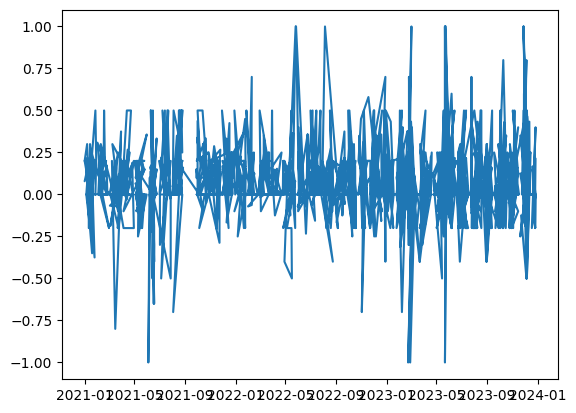

In [17]:
import matplotlib.pyplot as plt
plt.plot(merged_df['Date'],merged_df['sentiment'])

In [18]:
# Calculate stock price movement
def calculate_price_movement(row, horizon_days=1):
    pub_date = row['pub_date']
    future_date = pub_date + datetime.timedelta(days=horizon_days)
    
    future_price = stock_df[stock_df['Date'] == future_date]['Close'].values
    if len(future_price) == 0:
        return None
    
    future_price = future_price[0]
    current_price = row['Close']
    
    if future_price > current_price:
        return 'increase'
    elif future_price < current_price:
        return 'decrease'
    else:
        return 'no change'

# Apply the function to the merged DataFrame
merged_df['price_movement'] = merged_df.apply(calculate_price_movement, axis=1)
merged_df.dropna(subset=['price_movement'], inplace=True)

# Save the final labeled data
merged_df.to_csv('labeled_data.csv', index=False)

In [19]:
merged_df.sample(10)

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,price_movement
1240,"Ambuja stock dips 4%, ACC hits new 1-year low ...",https://news.google.com/rss/articles/CBMiqAFod...,2023-03-28,ambuja stock dips 4 acc hits new 1 year low ad...,0.068182,2023-03-28,622.599976,627.799988,571.549988,593.400024,586.919250,19860622,increase
7,Adani Green Energy commissions 150 MW solar pl...,https://news.google.com/rss/articles/CBMikAFod...,2021-01-20,adani green energy commissions 150 mw solar pl...,-0.100000,2021-01-20,529.000000,562.500000,529.000000,558.599976,544.880798,14440729,decrease
1840,Adani Power shares up 55% in six months; techn...,https://news.google.com/rss/articles/CBMilgFod...,2023-10-25,adani power shares 55 six months technical ana...,0.000000,2023-10-25,772.500000,783.349976,761.049988,769.099976,765.814270,2581498,increase
1735,"Nifty indices reshuffle this week: HDFC Bank, ...",https://news.google.com/rss/articles/CBMimAFod...,2023-09-27,nifty indices reshuffle week hdfc bank 2 adani...,0.000000,2023-09-27,825.799988,833.000000,821.500000,830.700012,827.151123,2463842,decrease
636,Adani Group-Holcim $10 bn mega deal: Key takea...,https://news.google.com/rss/articles/CBMihwFod...,2022-05-16,adani group holcim 10 bn mega deal key takeawa...,0.000000,2022-05-16,715.000000,728.150024,704.000000,712.500000,699.869995,5606071,increase
466,"Metro Brands, Indian Oil, India Cements and ot...",https://news.google.com/rss/articles/CBMikQFod...,2021-12-22,metro brands indian oil india cements hot stoc...,0.250000,2021-12-22,727.000000,729.900024,717.250000,722.849976,710.036621,3626585,increase
1939,Adani shares: Rajiv Jain's GQG mints Rs 3000 c...,https://news.google.com/rss/articles/CBMirAFod...,2023-11-28,adani shares rajiv jain gqg mints rs 3000 cr p...,0.000000,2023-11-28,806.000000,854.400024,806.000000,837.700012,834.121216,15929818,decrease
2028,Adani Wilmar shares in focus as promoter entit...,https://news.google.com/rss/articles/CBMikwFod...,2023-12-26,adani wilmar shares focus promoter entities lo...,0.000000,2023-12-26,1034.099976,1041.000000,1026.099976,1028.750000,1024.354980,2176775,decrease
775,How an unpaid loan aided Adani to make hostile...,https://news.google.com/rss/articles/CBMimQFod...,2022-08-24,unpaid loan aided adani make hostile takeover ...,0.200000,2022-08-24,830.250000,838.150024,817.099976,836.299988,827.166382,6558722,decrease
715,Why Zomato shares plunged to all-time low toda...,https://news.google.com/rss/articles/CBMidWh0d...,2022-07-25,zomato shares plunged time low today stock mar...,0.000000,2022-07-25,757.000000,757.250000,746.049988,749.950012,741.759521,1592179,decrease


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
# Feature Extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_features = tfidf_vectorizer.fit_transform(merged_df['cleaned_text']).toarray()

In [22]:
# Add TF-IDF features to the DataFrame
tfidf_df = pd.DataFrame(tfidf_features, columns=tfidf_vectorizer.get_feature_names_out())
merged_df = pd.concat([merged_df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)
merged_df

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,years,yes,yesterday,yoy,yr,zee,zeel,zomato,zoom,zooms
0,"Opposition takes on Adani's Rs 53,400-crore pr...",https://news.google.com/rss/articles/CBMikwFod...,2021-01-18,opposition takes adani rs 53 400 crore project...,0.0,2021-01-18,531.000000,532.299988,503.799988,515.500000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,Adani Green stock price up 4% after ACME Trade...,https://news.google.com/rss/articles/CBMihgFod...,2021-01-14,adani green stock price 4 acme trade investmen...,-0.2,2021-01-14,537.950012,542.450012,530.099976,536.950012,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,"Axis Bank, Tata Steel, NMDC among 65 stocks lo...",https://news.google.com/rss/articles/CBMikgFod...,2021-01-05,axis bank tata steel nmdc among 65 stocks look...,0.0,2021-01-05,498.899994,504.500000,492.000000,499.450012,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,Mid-cap Picks With Anil Singhvi: Adani Green E...,https://news.google.com/rss/articles/CBMimQFod...,2021-01-20,mid cap picks anil singhvi adani green energy ...,-0.1,2021-01-20,529.000000,562.500000,529.000000,558.599976,...,0.0,0.0,0.0,0.0,0.0,0.30807,0.0,0.0,0.0,0.0
4,"AAI hands over Jaipur, Guwahati, Thiruvanantha...",https://news.google.com/rss/articles/CBMirwFod...,2021-01-19,aai hands jaipur guwahati thiruvananthapuram a...,0.0,2021-01-19,516.000000,535.000000,516.000000,532.799988,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,Adani Wilmar shares in focus as promoter entit...,https://news.google.com/rss/articles/CBMikwFod...,2023-12-26,adani wilmar shares focus promoter entities lo...,0.0,2023-12-26,1034.099976,1041.000000,1026.099976,1028.750000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1520,"Adani Green Energy promoters to infuse ₹9,350 ...",https://news.google.com/rss/articles/CBMioAFod...,2023-12-26,adani green energy promoters infuse 9 350 cror...,-0.2,2023-12-26,1034.099976,1041.000000,1026.099976,1028.750000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1521,Adani Ports shares in focus as board to consid...,https://news.google.com/rss/articles/CBMinAFod...,2023-12-27,adani ports shares focus board consider ncd is...,0.0,2023-12-27,1037.000000,1037.050049,1018.000000,1024.400024,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1522,"Stocks to Watch today: Paytm, Adani Wilmar, ON...",https://news.google.com/rss/articles/CBMihwFod...,2023-12-26,stocks watch today paytm adani wilmar ongc lup...,0.0,2023-12-26,1034.099976,1041.000000,1026.099976,1028.750000,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [23]:
# Feature Extraction: LDA (Topic Modeling)
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda_model.fit_transform(tfidf_features)

In [24]:
# Add LDA features to the DataFrame
for i in range(lda_features.shape[1]):
    merged_df[f'topic_{i}'] = lda_features[:, i]

In [25]:
# Save the final labeled and feature-enriched data
merged_df.to_csv('labeled_data_with_features.csv', index=False)
merged_df.head()

,title,link,pub_date,cleaned_text,sentiment,Date,Open,High,Low,Close,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"Opposition takes on Adani's Rs 53,400-crore pr...",https://news.google.com/rss/articles/CBMikwFod...,2021-01-18,opposition takes adani rs 53 400 crore project...,0.0,2021-01-18,531.000000,532.299988,503.799988,515.500000,...,0.024582,0.340238,0.024595,0.271282,0.024588,0.024585,0.024590,0.024596,0.024581,0.216362
1,Adani Green stock price up 4% after ACME Trade...,https://news.google.com/rss/articles/CBMihgFod...,2021-01-14,adani green stock price 4 acme trade investmen...,-0.2,2021-01-14,537.950012,542.450012,530.099976,536.950012,...,0.025905,0.416021,0.025908,0.025908,0.025905,0.025900,0.025907,0.376738,0.025903,0.025904
2,"Axis Bank, Tata Steel, NMDC among 65 stocks lo...",https://news.google.com/rss/articles/CBMikgFod...,2021-01-05,axis bank tata steel nmdc among 65 stocks look...,0.0,2021-01-05,498.899994,504.500000,492.000000,499.450012,...,0.023864,0.023865,0.023863,0.023863,0.589594,0.219474,0.023868,0.023883,0.023865,0.023860
3,Mid-cap Picks With Anil Singhvi: Adani Green E...,https://news.google.com/rss/articles/CBMimQFod...,2021-01-20,mid cap picks anil singhvi adani green energy ...,-0.1,2021-01-20,529.000000,562.500000,529.000000,558.599976,...,0.024674,0.024683,0.024679,0.024677,0.216708,0.024675,0.024695,0.024675,0.585857,0.024679
4,"AAI hands over Jaipur, Guwahati, Thiruvanantha...",https://news.google.com/rss/articles/CBMirwFod...,2021-01-19,aai hands jaipur guwahati thiruvananthapuram a...,0.0,2021-01-19,516.000000,535.000000,516.000000,532.799988,...,0.030177,0.030183,0.030179,0.030179,0.030184,0.030180,0.030179,0.728387,0.030176,0.030176


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import numpy as np

# Load the labeled dataset with features
data = pd.read_csv('labeled_data_with_features.csv')

# Label encode the target variable
label_encoder = LabelEncoder()
data['encoded_movement'] = label_encoder.fit_transform(data['price_movement'])
data[['encoded_movement','price_movement']]

,encoded_movement,price_movement
0,1,increase
1,0,decrease
2,0,decrease
3,0,decrease
4,1,increase
...,...,...
1519,0,decrease
1520,0,decrease
1521,0,decrease
1522,0,decrease


In [28]:
from sklearn.model_selection import train_test_split
# Select relevant features and target
X = data[['sentiment'] + list(data.columns[-1:-11])]  # Sentiment and TF-IDF features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = label_encoder.inverse_transform(y_test)

# Convert categorical labels to binary labels using numpy
y_test_binary = np.where(y_test == 'increase', 1, 0)

In [33]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg = label_encoder.inverse_transform(y_pred_logreg)
y_pred_logreg = np.where(y_pred_logreg == 'increase', 1, 0)

# Evaluate models
print("Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.40      0.01      0.03       143
           1       0.53      0.98      0.69       162

    accuracy                           0.53       305
   macro avg       0.47      0.50      0.36       305
weighted avg       0.47      0.53      0.38       305

Accuracy: 0.5278688524590164


In [34]:
# Train SVM model
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm = label_encoder.inverse_transform(y_pred_svm)
y_pred_svm = np.where(y_pred_svm == 'increase', 1, 0)

print("\nSupport Vector Machine (SVM):")
print(classification_report(y_test_binary, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_svm))


Support Vector Machine (SVM):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.53      1.00      0.69       162

    accuracy                           0.53       305
   macro avg       0.27      0.50      0.35       305
weighted avg       0.28      0.53      0.37       305

Accuracy: 0.5311475409836065


c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [35]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf = label_encoder.inverse_transform(y_pred_rf)
y_pred_rf = np.where(y_pred_rf == 'increase', 1, 0)

print("\nRandom Forest:")
print(classification_report(y_test_binary, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_binary, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.22      0.32       143
           1       0.56      0.89      0.69       162

    accuracy                           0.57       305
   macro avg       0.60      0.55      0.51       305
weighted avg       0.60      0.57      0.52       305

Accuracy: 0.5737704918032787


In [36]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Model: {model_name}")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print()

In [37]:
# Evaluate Logistic Regression
evaluate_model(y_test_binary, y_pred_logreg, "Logistic Regression")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.40      0.01      0.03       143
           1       0.53      0.98      0.69       162

    accuracy                           0.53       305
   macro avg       0.47      0.50      0.36       305
weighted avg       0.47      0.53      0.38       305

Accuracy: 0.5278688524590164
Confusion Matrix:
[[  2 141]
 [  3 159]]



In [38]:
# Evaluate SVM
evaluate_model(y_test_binary, y_pred_svm, "Support Vector Machine (SVM)")

Model: Support Vector Machine (SVM)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       143
           1       0.53      1.00      0.69       162

    accuracy                           0.53       305
   macro avg       0.27      0.50      0.35       305
weighted avg       0.28      0.53      0.37       305

Accuracy: 0.5311475409836065
Confusion Matrix:
[[  0 143]
 [  0 162]]



c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [39]:
# Evaluate Random Forest
evaluate_model(y_test_binary, y_pred_rf, "Random Forest")

Model: Random Forest
              precision    recall  f1-score   support

           0       0.63      0.22      0.32       143
           1       0.56      0.89      0.69       162

    accuracy                           0.57       305
   macro avg       0.60      0.55      0.51       305
weighted avg       0.60      0.57      0.52       305

Accuracy: 0.5737704918032787
Confusion Matrix:
[[ 31 112]
 [ 18 144]]



In [40]:
# ROC Curve and AUC for SVM (assuming binary classification)
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

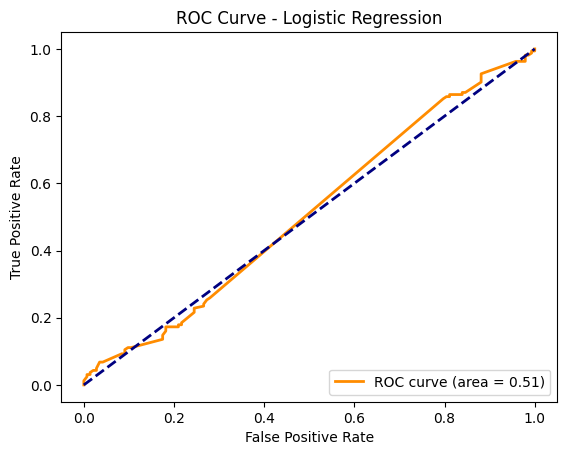

In [41]:
# Get probabilities for Logistic Regression (required for ROC curve)
y_pred_proba_logreg = logreg.predict_proba(X_test)
# Plot ROC curve for Logistic Regression
plot_roc_curve(y_test_binary, y_pred_proba_logreg, "Logistic Regression")

In [42]:
# Get probabilities for SVM (required for ROC curve)
y_pred_proba_svm = svm.predict_proba(X_test)

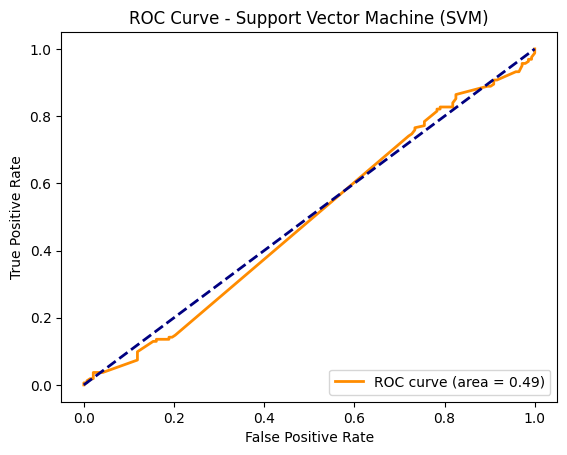

In [43]:
# Plot ROC curve for SVM
plot_roc_curve(y_test_binary, y_pred_proba_svm, "Support Vector Machine (SVM)")

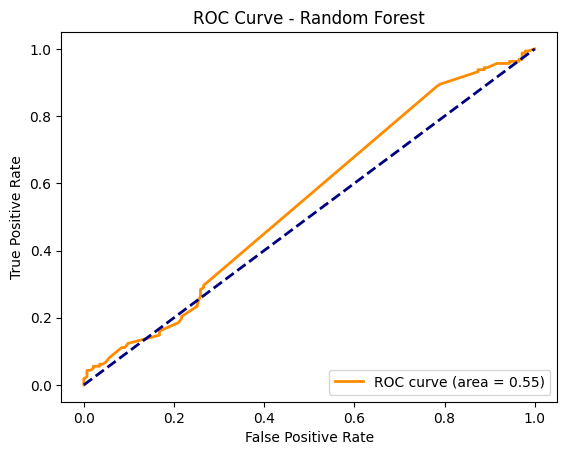

In [44]:
# Get probabilities for Random Forest (required for ROC curve)
y_pred_proba_rf = rf.predict_proba(X_test)
# Plot ROC curve for Random Forest
plot_roc_curve(y_test_binary, y_pred_proba_rf, "Random Forest")

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Select relevant features and target
X_text = data['cleaned_text']  # Cleaned text features
X_numeric = data.drop(['price_movement', 'cleaned_text'], axis=1)  # Numeric features
y = data['encoded_movement']  # Encoded target variable

# Split data into train and test sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_text_test).toarray()


In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Define neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_tfidf.shape[1]),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



c:\Users\risha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Train the model
model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Accuracy:", accuracy_score(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5234 - loss: 0.6912 - val_accuracy: 0.5311 - val_loss: 0.6895
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5548 - loss: 0.6777 - val_accuracy: 0.5508 - val_loss: 0.6845
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6948 - loss: 0.6475 - val_accuracy: 0.5541 - val_loss: 0.6745
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7962 - loss: 0.5594 - val_accuracy: 0.5770 - val_loss: 0.6747
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.4261 - val_accuracy: 0.5902 - val_loss: 0.7281
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8707 - loss: 0.3359 - val_accuracy: 0.5967 - val_loss: 0.7679
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9176 - loss: 0.2505 - val_accuracy: 0.6164 - val_loss: 0.8254
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9321 - loss: 0.1853 - val_accuracy: 0.6164 - val_loss:

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9727 - loss: 0.0851 - val_accuracy: 0.6033 - val_loss: 1.0793
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9844 - loss: 0.0565 - val_accuracy: 0.6066 - val_loss: 1.1329
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0527 - val_accuracy: 0.5902 - val_loss: 1.1937
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0470 - val_accuracy: 0.6197 - val_loss: 1.2319
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0344 - val_accuracy: 0.6066 - val_loss: 1.2983
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0379 - val_accuracy: 0.6000 - val_loss: 1.3408
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0257 - val_accuracy: 0.6033 - val_loss: 1.4254
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.0054 - val_accuracy: 0.5836 - val_loss:

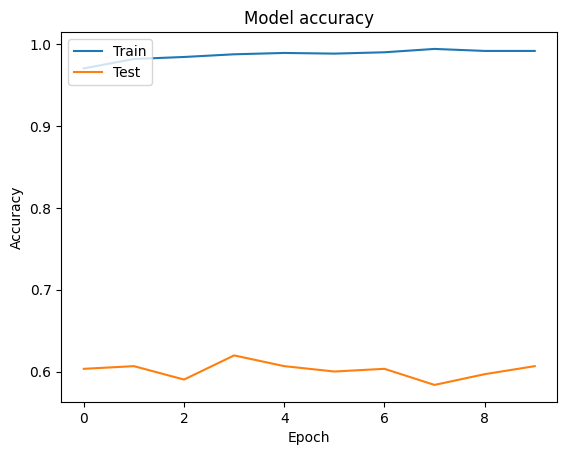

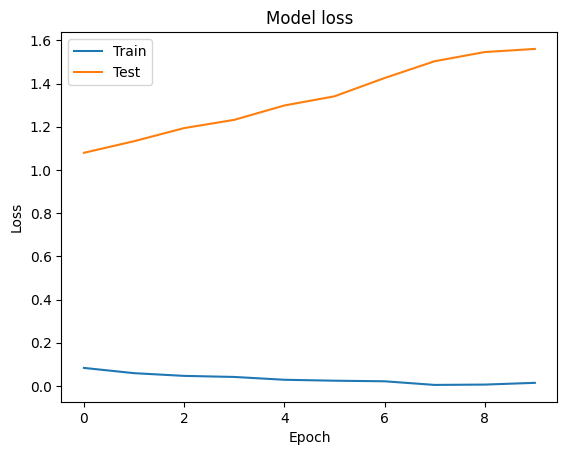

In [49]:
import matplotlib.pyplot as plt

# Train the model and capture the history
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))

# Plot training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


In [50]:
def aggregate_sentiment_scores(headlines_df):
    sentiment_summary = headlines_df.groupby('Date')['sentiment'].mean()
    return sentiment_summary

def generate_trading_signals(sentiment_summary):
    signals = sentiment_summary.apply(lambda x: 1 if x > 0.2 else (-1 if x < -0.2 else 0))
    return signals

In [51]:
def calculate_portfolio_metrics(portfolio):
    total_trades = len(portfolio) // 2
    wins = portfolio[portfolio['type'] == 'sell']['profit'] > 0
    win_percentage = wins.mean() * 100
    total_profit = portfolio[portfolio['type'] == 'sell']['profit'].sum()
    
    return total_trades, win_percentage, total_profit

def calculate_sharpe_ratio(portfolio, risk_free_rate=0.01):
    daily_returns = portfolio[portfolio['type'] == 'sell']['profit']
    excess_returns = daily_returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()
    return sharpe_ratio

def calculate_max_drawdown(portfolio):
    portfolio['cumulative_profit'] = portfolio['profit'].cumsum()
    cumulative_max = portfolio['cumulative_profit'].cummax()
    drawdown = portfolio['cumulative_profit'] - cumulative_max
    max_drawdown = drawdown.min()
    return max_drawdown

In [52]:
import plotly.graph_objects as go

def plot_signals(stock_data, portfolio):
    start_date = portfolio['date'].min()
    end_date = portfolio['date'].max()

    # Filter stock data to the date range available in the portfolio
    stock_data = stock_data[(stock_data['Date'] >= start_date) & (stock_data['Date'] <= end_date)]
    
    buy_signals = portfolio[portfolio['type'] == 'buy']
    sell_signals = portfolio[portfolio['type'] == 'sell']
    fig = go.Figure()
    # Add stock price trace
    fig.add_trace(go.Scatter(
        x=stock_data['Date'], 
        y=stock_data['Close'],
        mode='lines',
        name='Stock Price',
        line=dict(color='blue')
    ))

    # Add buy signals
    fig.add_trace(go.Scatter(
        x=buy_signals['date'], 
        y=buy_signals['price'],
        mode='markers',
        name='Buy Signal',
        marker=dict(symbol='triangle-up', color='green', size=10)
    ))

    # Add sell signals
    fig.add_trace(go.Scatter(
        x=sell_signals['date'], 
        y=sell_signals['price'],
        mode='markers',
        name='Sell Signal',
        marker=dict(symbol='triangle-down', color='red', size=10)
    ))
    # Update layout for better presentation
    fig.update_layout(
        title=f'Stock Price with Buy and Sell Signals for Adani Ports',
        xaxis_title='Date',
        yaxis_title='Price',
        legend_title='Legend',
        hovermode='x'
    )
    fig.show()

In [53]:
def simulate_trades(stock_data, trading_signals,capital):
    data = pd.read_csv('merged_data.csv')
    date = data['Date']
    portfolio = []
    position = 0
    buy_price = 0
    quantity =0
    for index, price in (stock_data['Close'].items()):
        if date[index] in trading_signals.index:
            signal = trading_signals.loc[date[index]]
            if signal == 1 and position == 0:  # Buy signal
                position = 1
                buy_price = price
                quantity = capital/price
                capital = capital%price
                portfolio.append({'date': date[index], 'type': "buy", 'price': buy_price, 'capital':capital})
            elif signal == -1 and position == 1 and (price>buy_price) :  # Sell signal
                position = 0
                sell_price = price
                profit = (sell_price - buy_price)*quantity
                capital = capital+ quantity*sell_price
                portfolio.append({'date': date[index], 'type': "sell", 'price': sell_price,'capital':capital, 'profit': profit})

    return pd.DataFrame(portfolio)


In [54]:
def final(rate, intial):

    # Fetch stock data
    # stock_data = fetch_stock_data(ticker)

    # Fetch news data
    news_data = pd.read_csv('merged_data.csv')
    # Calculate sentiment scores
    news_data_with_scores = news_data[['Date','sentiment']]
    # Aggregate sentiment scores by date
    sentiment_summary = aggregate_sentiment_scores(news_data_with_scores)
    # Generate trading signals
    trading_signals = generate_trading_signals(sentiment_summary)
    # Simulate trades
    print("\nSimulating trades...")
    portfolio = simulate_trades(news_data, trading_signals, intial)
    # print(len(portfolio))
    # print("\nddffj")
    # Calculate portfolio metrics
    total_trades, win_percentage, total_profit = calculate_portfolio_metrics(portfolio)
    # Print the portfolio
    print(portfolio)
    print(f"\nInitial capital: ${intial}")
    print(f"Total Trades: {total_trades}")
    print(f"Win Percentage: {win_percentage:.2f}%")
    print(f"Total Portfolio Returns: ${total_profit:.2f}")
    print(f"Sharpe ratio:{calculate_sharpe_ratio(portfolio, rate):.2f} with risk free rate of {rate}")
    print(f"Max drawdown: {calculate_max_drawdown(portfolio)}")
    # Plot buy and sell signals
    plot_signals(news_data, portfolio)

In [55]:
final(0.03, 10000)


Simulating trades...
         date  type       price       capital       profit
0  2021-01-27   buy  518.849976    141.850464          NaN
1  2021-03-16  sell  717.349976  13967.619170  3825.768707
2  2021-04-23   buy  725.349976    185.969634          NaN
3  2021-06-04  sell  833.849976  16242.906694  2089.317889
4  2021-07-08   buy  711.700012    585.506425          NaN
5  2022-01-06  sell  739.799988  17469.730070   641.316951
6  2022-01-03   buy  736.599976    527.930632          NaN
7  2022-05-17  sell  744.750000  18190.952490   193.291788
8  2022-05-20   buy  767.549988    537.302771          NaN

Initial capital: $10000
Total Trades: 4
Win Percentage: 100.00%
Total Portfolio Returns: $6749.70
Sharpe ratio:1.03 with risk free rate of 0.03
Max drawdown: 0.0
